In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Represents the overall DAG workflow
workflow_graph = nx.DiGraph()

# Represents the task to aggregrate the weekly sales dataset
agg_sales_task = 'AggSalesTask'

# Represents the task to create the latest demographics dataset
latest_demo_task = 'LatestDemoTask'

# Represents the task to aggregrate the weekly weather dataset
agg_weather_task = 'AggWeatherTask'

# Represents the task to create the weekly modeling dataset
modeling_data_task = 'ModelingTask'

# Represents the latest ACS Summary File data
latest_acs_data = 'LatestACSData'

# Represents the latest PUMS data
latest_pums_data = 'LatestPUMSData'

# Represents the latest Tiger data
latest_tiger_data = 'LatestTigerData'

# Represents the sales data for each day
sales_data0 = 'SalesData0'
sales_data1 = 'SalesData1'
sales_data2 = 'SalesData2'
sales_data3 = 'SalesData3'
sales_data4 = 'SalesData4'
sales_data5 = 'SalesData5'
sales_data6 = 'SalesData6'

# A collection containing the weekly sales data
sales_data = [
    sales_data0,
    sales_data1,
    sales_data2,
    sales_data3,
    sales_data4,
    sales_data5,
    sales_data6
]

# Represents the forecast data for each day
forecast_data0 = 'ForecastData0'
forecast_data1 = 'ForecastData1'
forecast_data2 = 'ForecastData2'
forecast_data3 = 'ForecastData3'
forecast_data4 = 'ForecastData4'
forecast_data5 = 'ForecastData5'
forecast_data6 = 'ForecastData6'

# A collection containing the weekly forecast data
forecast_data = [
    forecast_data0,
    forecast_data1,
    forecast_data2,
    forecast_data3,
    forecast_data4,
    forecast_data5,
    forecast_data6
]

# Represents the aggregated sales dataset
agg_sales_data = 'AggSalesData'

# Represents the aggregated weather dataset
agg_weather_data = 'AggWeatherData'

# Represents the latest demographic dataset
latest_demo_data = 'LatestDemoData'

# Represents the weekly modeling dataset
modeling_data = 'ModelingData'

In [2]:
# TODO: Add the sales data nodes with dtype='data' attribute
for sale in sales_data:
    workflow_graph.add_node(sale, dtype='data')
    
# TODO: Add the forecast data nodes with dtype='data' attribute
for forecast in forecast_data:
    workflow_graph.add_node(forecast, dtype='data')
    
# TODO: Add the latest PUMS data node with dtype='data' attribute
workflow_graph.add_node(latest_pums_data, dtype='data')

# TODO: Add the latest ACS data node with dtype='data' attribute
workflow_graph.add_node(latest_acs_data, dtype='data')

# TODO: Add the latest Tiger data node with dtype='data' attribute
workflow_graph.add_node(latest_tiger_data, dtype='data')

# TODO: Add the aggregated sales data node with dtype='data' attribute
workflow_graph.add_node(agg_sales_data, dtype='data')

# TODO: Add the aggregated weather data node with dtype='data' attribute
workflow_graph.add_node(agg_weather_data, dtype='data')

# TODO: Add the latest demographic data node with dtype='data' attribute
workflow_graph.add_node(latest_demo_data, dtype='data')

# TODO: Add the modeling data node with dtype='data' attribute
workflow_graph.add_node(modeling_data, dtype='data')

# TODO: Add the aggregate sales task node with dtype='task' attribute
workflow_graph.add_node(agg_sales_task, dtype='task')

# TODO: Add the latest demographics data task node with dtype='task' attribute
workflow_graph.add_node(latest_demo_task, dtype='task')

# TODO: Add the aggregate weather task node with dtype='task' attribute
workflow_graph.add_node(agg_weather_task, dtype='task')

# TODO: Add the modeling data task node with dtype='task' attribute
workflow_graph.add_node(modeling_data_task, dtype='task')

In [3]:
# Prints the number of nodes and edges in the graph
print('Number of nodes: {}, Number of edges: {}'.format(
    len(workflow_graph.nodes), len(workflow_graph.edges)
))

Number of nodes: 25, Number of edges: 0


In [4]:
# TODO: Add all the inputs for `agg_sales_task`
for sale in sales_data:
    workflow_graph.add_edge(sale, agg_sales_task)

# TODO: Add the output for `agg_sales_task`
workflow_graph.add_edge(agg_sales_task, agg_sales_data)

# TODO: Add all the inputs for `agg_weather_task`
for forecast in forecast_data:
    workflow_graph.add_edge(forecast, agg_weather_task)

# TODO: Add the output for `agg_weather_task`
workflow_graph.add_edge(agg_weather_task, agg_weather_data)

# TODO: Add all the inputs for `latest_demo_task`
for census_data in [latest_acs_data, latest_pums_data, latest_tiger_data]:
    workflow_graph.add_edge(census_data, latest_demo_task)

# TODO: Add the outputs for `latest_demo_task`
workflow_graph.add_edge(latest_demo_task, latest_demo_data)

# TODO: Add all the inputs for `modeling_data_task`
for model_data in [agg_sales_data, agg_weather_data, latest_demo_data]:
    workflow_graph.add_edge(model_data, modeling_data_task)

# TODO: Add the output for `modeling_data_task`
workflow_graph.add_edge(modeling_data_task, modeling_data)

# Prints the number of nodes and edges in the graph
print('Number of nodes: {}, Number of edges: {}'.format(
    len(workflow_graph.nodes), len(workflow_graph.edges)
))

Number of nodes: 25, Number of edges: 24


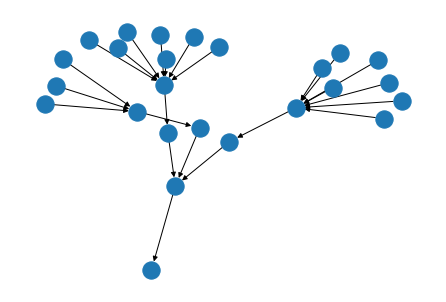

In [5]:
nx.draw(workflow_graph)

In [6]:
# TODO: Run this code to check your workflow for cycles

if nx.is_directed_acyclic_graph(workflow_graph):
    print('Good Result: No cycles found in your workflow!')  
else:
    print('Bad Result: Cycles found in your workflow!')

Good Result: No cycles found in your workflow!


In [7]:
# TODO: Find all the dependencies for the aggregated sales dataset
from networkx.algorithms.dag import ancestors

agg_sales_data_deps = ancestors(workflow_graph, agg_sales_data)
agg_sales_data_deps

{'AggSalesTask',
 'SalesData0',
 'SalesData1',
 'SalesData2',
 'SalesData3',
 'SalesData4',
 'SalesData5',
 'SalesData6'}

In [8]:
# TODO: Find all the dependencies for the latest demographics dataset

last_demo_data_deps = ancestors(workflow_graph, latest_demo_data)
last_demo_data_deps

{'LatestACSData', 'LatestDemoTask', 'LatestPUMSData', 'LatestTigerData'}

In [9]:
task_nodes = {
    node_name
    for node_name, data_dict in workflow_graph.nodes.data()
    if data_dict['dtype'] == 'task'
}

task_nodes

{'AggSalesTask', 'AggWeatherTask', 'LatestDemoTask', 'ModelingTask'}

In [10]:
# TODO: Find all the task dependencies for the modeling data set

modeling_data_task_deps = {
    node_name
    for node_name in ancestors(workflow_graph, modeling_data)
    if node_name in task_nodes    
}

modeling_data_task_deps

{'AggSalesTask', 'AggWeatherTask', 'LatestDemoTask', 'ModelingTask'}

In [11]:
# TODO: Verify that there are no tasks or datasets in the workflow that depend on `modeling_data`
from networkx.algorithms.dag import descendants

modeling_data_descendants = descendants(workflow_graph, modeling_data)
modeling_data_descendants

set()